<a href="https://colab.research.google.com/github/vajihe-ameri/predict-software-bugs-in-java-classes/blob/main/hazelcastByBaghani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#***import requirements***#
#-------------------------#
import pandas as pd
import keras
import numpy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive = drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#***import requirements***#
#-------------------------#
import keras
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.constraints import max_norm
from keras.callbacks import ModelCheckpoint
import numpy
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/new_df/best_model.hdf5"

In [3]:
test_features = pd.read_csv("/content/drive/MyDrive/new_df/test_set_hazelcast.csv")
train_features = pd.read_csv("/content/drive/MyDrive/new_df/train_set_hazelcast.csv")
test_target = pd.read_csv("/content/drive/MyDrive/new_df/test_set_NB_hazelcast.csv")
train_target = pd.read_csv("/content/drive/MyDrive/new_df/train_set_NB_hazelcast.csv")

In [4]:
#Create and import new combined dataset features

main_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_3classes")
test_prediction_points = main_model.predict(test_features)
train_prediction_points = main_model.predict(train_features)
main_model_test_prediction_df = pd.DataFrame (data=test_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])
main_model_train_prediction_df = pd.DataFrame (data=train_prediction_points, columns=['main_0_p', 'main_1_p', 'main_2_p'])

zero_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class0")
test_prediction_points = zero_other_model.predict(test_features)
train_prediction_points = zero_other_model.predict(train_features)
zero_other_test_prediction_df = pd.DataFrame ({'0&other': test_prediction_points.ravel()})
zero_other_train_prediction_df = pd.DataFrame ({'0&other': train_prediction_points.ravel()})

one_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class1")
test_prediction_points = one_other_model.predict(test_features)
train_prediction_points = one_other_model.predict(train_features)
one_other_test_prediction_df = pd.DataFrame ({'1&other': test_prediction_points.ravel()})
one_other_train_prediction_df = pd.DataFrame ({'1&other': train_prediction_points.ravel()})

two_other_model = keras.models.load_model("/content/drive/MyDrive/new_df/best_model_by_class2")
test_prediction_points = two_other_model.predict(test_features)
train_prediction_points = two_other_model.predict(train_features)
two_other_test_prediction_df = pd.DataFrame ({'2&other': test_prediction_points.ravel()})
two_other_train_prediction_df = pd.DataFrame ({'2&other': train_prediction_points.ravel()})

randomForest_model = RandomForestClassifier(n_estimators=70, max_depth= 19, min_samples_split=2, random_state=0)
randomForest_model.fit(train_features, train_target.values.ravel())
randomForest_model_test_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(test_features)})
randomForest_model_train_prediction_df = pd.DataFrame ({'randomForest': randomForest_model.predict(train_features)})

#combined new test & train features
test_features = pd.concat([main_model_test_prediction_df, zero_other_test_prediction_df, one_other_test_prediction_df, two_other_test_prediction_df, randomForest_model_test_prediction_df], axis=1)
train_features = pd.concat([main_model_train_prediction_df, zero_other_train_prediction_df, one_other_train_prediction_df, two_other_train_prediction_df, randomForest_model_train_prediction_df], axis=1)

524/524 [==============================] - 1s 1ms/step


In [5]:
!pip install tensorflow-addons
import tensorflow_addons
f_measure = tensorflow_addons.metrics.F1Score(num_classes=2, average='micro', threshold=0.5)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.3 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [8]:
#***Build Model***#
#-----------------#
model = Sequential()

model.add(Dense(90, kernel_initializer = 'uniform', activation = 'relu', input_dim = train_features.shape[1]))
model.add(Dense(70, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(50, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(30, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(10, kernel_initializer = 'uniform', kernel_constraint=max_norm(2.), activation = 'relu'))
model.add(Dense(3, kernel_initializer = 'uniform', activation = 'softmax'))

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

checkpoint = ModelCheckpoint(file_path, monitor='loss', verbose=1,save_best_only=True, mode='auto', period=100)

#model.summary()

Epoch 1/1000
23/23 [==============================] - 2s 15ms/step - loss: 1.0949 - accuracy: 0.4076 - val_loss: 1.1326 - val_accuracy: 0.0000e+00
Epoch 2/1000
23/23 [==============================] - 0s 5ms/step - loss: 1.0841 - accuracy: 0.4167 - val_loss: 1.1733 - val_accuracy: 0.0000e+00
Epoch 3/1000
23/23 [==============================] - 0s 6ms/step - loss: 1.0041 - accuracy: 0.4291 - val_loss: 1.1862 - val_accuracy: 0.0000e+00
Epoch 4/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.7210 - accuracy: 0.5369 - val_loss: 0.6646 - val_accuracy: 0.9946
Epoch 5/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.3736 - accuracy: 0.9070 - val_loss: 0.2938 - val_accuracy: 0.9946
Epoch 6/1000
23/23 [==============================] - 0s 6ms/step - loss: 0.2629 - accuracy: 0.9388 - val_loss: 0.3133 - val_accuracy: 0.9946
Epoch 7/1000
23/23 [==============================] - 0s 6ms/step - loss: 0.2498 - accuracy: 0.9388 - val_loss: 0.2846 - val_accuracy: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 1s 27ms/step - loss: 0.2157 - accuracy: 0.9388 - val_loss: 0.2753 - val_accuracy: 0.9946
Epoch 101/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.2154 - accuracy: 0.9388 - val_loss: 0.2764 - val_accuracy: 0.9946
Epoch 102/1000
23/23 [==============================] - 0s 6ms/step - loss: 0.2154 - accuracy: 0.9388 - val_loss: 0.2715 - val_accuracy: 0.9946
Epoch 103/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.2156 - accuracy: 0.9388 - val_loss: 0.2865 - val_accuracy: 0.9946
Epoch 104/1000
23/23 [==============================] - 0s 5ms/step - loss: 0.2152 - accuracy: 0.9388 - val_loss: 0.2939 - val_accuracy: 0.9946
Epoch 105/1000
23/23 [==============================] - 0s 7ms/step - loss: 0.2164 - accuracy: 0.9388 - val_loss: 0.2924 - val_accuracy: 0.9946
Epoch 106/1000
23/23 [==============================] - 0s 9ms/step - loss: 0.2158 - accuracy: 0.9388 - val_loss: 0.2701 - val_accuracy: 0.9946
Epoch 

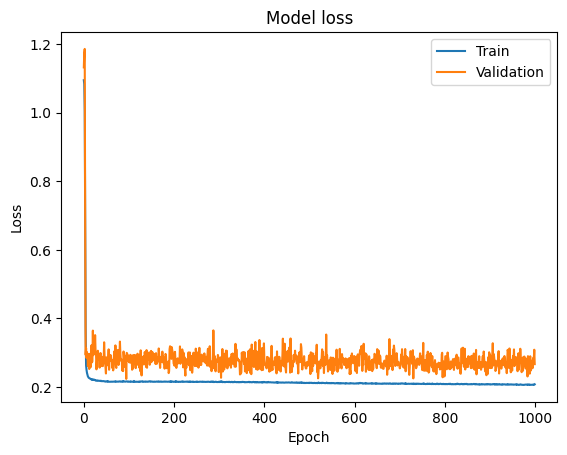



*********************************************




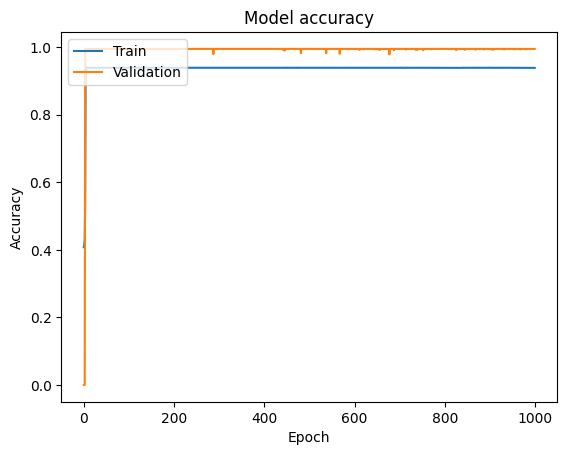



*********************************************
Test-set evaluate result:

93/93 [==============================] - 0s 1ms/step - loss: 2.7523 - accuracy: 0.3602
[2.752333879470825, 0.3601895868778229]
93/93 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.46      0.47      0.46      1363
     class 1       0.23      0.20      0.22      1097
     class 2       0.34      0.41      0.37       494

    accuracy                           0.36      2954
   macro avg       0.34      0.36      0.35      2954
weighted avg       0.35      0.36      0.36      2954



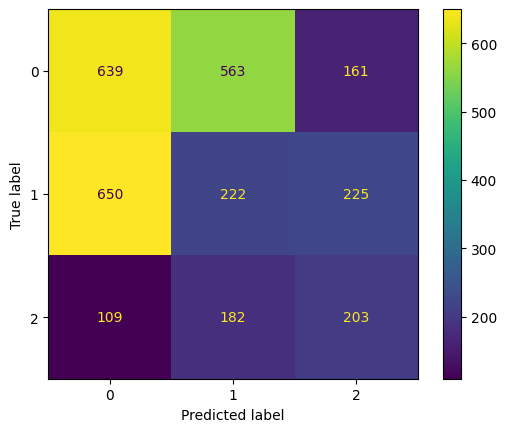



*********************************************
Train-set evaluate result:

524/524 [==============================] - 1s 1ms/step - loss: 0.2195 - accuracy: 0.9500
[0.21945513784885406, 0.949999988079071]
524/524 [==============================] - 1s 1ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.98      0.96      0.97      5580
     class 1       0.98      0.90      0.94      5580
     class 2       0.90      0.99      0.94      5580

    accuracy                           0.95     16740
   macro avg       0.95      0.95      0.95     16740
weighted avg       0.95      0.95      0.95     16740



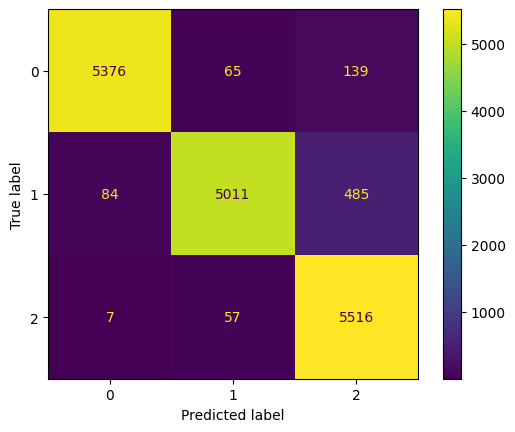

In [9]:
#***Model First Try Learning***#
#------------------------------#

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 600, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

Epoch 1/1000
2/2 [==============================] - 0s 87ms/step - loss: 0.2081 - accuracy: 0.9388 - val_loss: 0.2716 - val_accuracy: 0.9946
Epoch 2/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.2091 - accuracy: 0.9388 - val_loss: 0.2800 - val_accuracy: 0.9946
Epoch 3/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.2078 - accuracy: 0.9389 - val_loss: 0.2873 - val_accuracy: 0.9946
Epoch 4/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.2065 - accuracy: 0.9389 - val_loss: 0.2908 - val_accuracy: 0.9946
Epoch 5/1000
2/2 [==============================] - 0s 46ms/step - loss: 0.2059 - accuracy: 0.9389 - val_loss: 0.2891 - val_accuracy: 0.9946
Epoch 6/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.2057 - accuracy: 0.9388 - val_loss: 0.2826 - val_accuracy: 0.9946
Epoch 7/1000
2/2 [==============================] - 0s 43ms/step - loss: 0.2055 - accuracy: 0.9388 - val_loss: 0.2730 - val_accuracy: 0.9946
Epoch 8/1000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2/2 [==============================] - 0s 78ms/step - loss: 0.2043 - accuracy: 0.9389 - val_loss: 0.2675 - val_accuracy: 0.9946
Epoch 103/1000
2/2 [==============================] - 0s 51ms/step - loss: 0.2043 - accuracy: 0.9389 - val_loss: 0.2682 - val_accuracy: 0.9946
Epoch 104/1000
2/2 [==============================] - 0s 45ms/step - loss: 0.2043 - accuracy: 0.9389 - val_loss: 0.2692 - val_accuracy: 0.9946
Epoch 105/1000
2/2 [==============================] - 0s 62ms/step - loss: 0.2043 - accuracy: 0.9389 - val_loss: 0.2702 - val_accuracy: 0.9946
Epoch 106/1000
2/2 [==============================] - 0s 42ms/step - loss: 0.2043 - accuracy: 0.9389 - val_loss: 0.2712 - val_accuracy: 0.9946
Epoch 107/1000
2/2 [==============================] - 0s 44ms/step - loss: 0.2043 - accuracy: 0.9389 - val_loss: 0.2715 - val_accuracy: 0.9946
Epoch 108/1000
2/2 [==============================] - 0s 48ms/step - loss: 0.2043 - accuracy: 0.9389 - val_loss: 0.2708 - val_accuracy: 0.9946
Epoch 109/1000

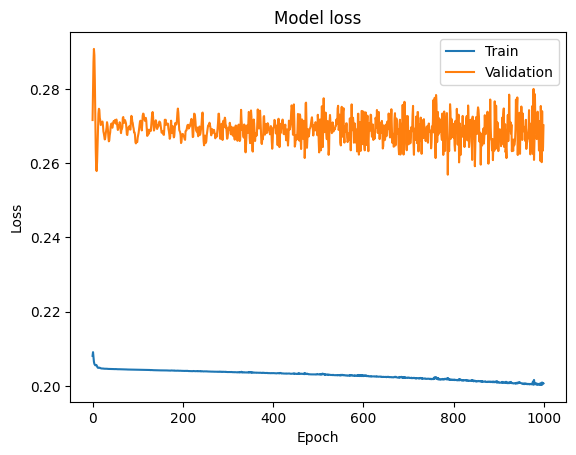



*********************************************




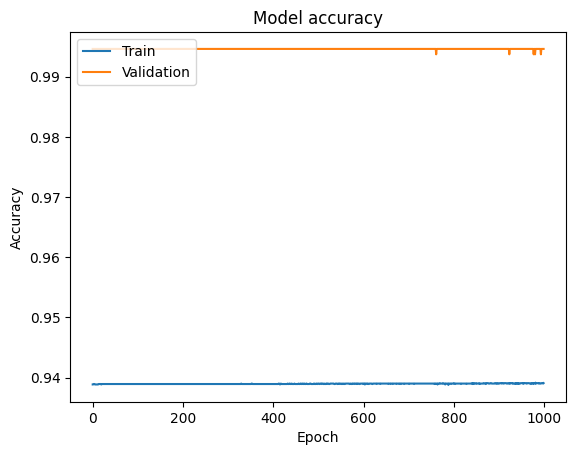



*********************************************
Test-set evaluate result:

93/93 [==============================] - 0s 2ms/step - loss: 3.2646 - accuracy: 0.3602
[3.264554500579834, 0.3601895868778229]
93/93 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.46      0.47      0.46      1363
     class 1       0.23      0.20      0.22      1097
     class 2       0.34      0.41      0.37       494

    accuracy                           0.36      2954
   macro avg       0.34      0.36      0.35      2954
weighted avg       0.35      0.36      0.36      2954



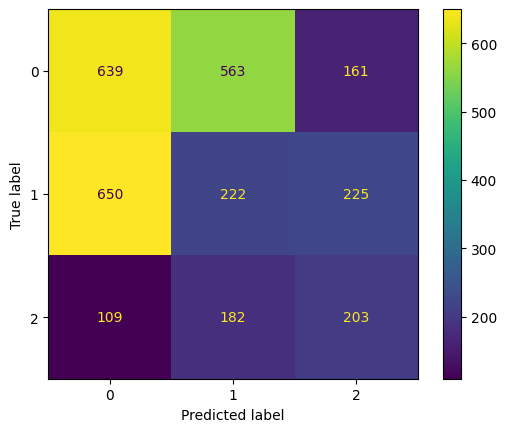



*********************************************
Train-set evaluate result:

524/524 [==============================] - 1s 2ms/step - loss: 0.2144 - accuracy: 0.9502
[0.21437272429466248, 0.9501792192459106]
524/524 [==============================] - 1s 1ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.98      0.96      0.97      5580
     class 1       0.98      0.90      0.94      5580
     class 2       0.90      0.99      0.94      5580

    accuracy                           0.95     16740
   macro avg       0.95      0.95      0.95     16740
weighted avg       0.95      0.95      0.95     16740



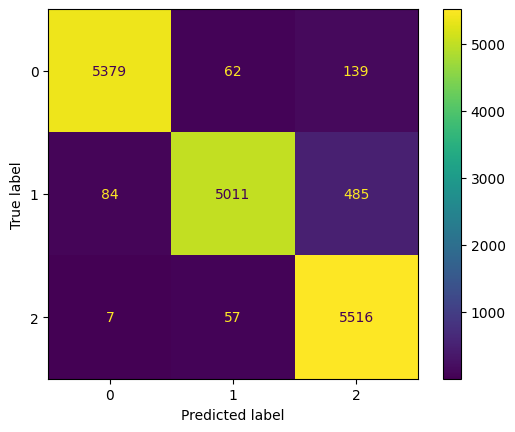

In [10]:
#***Model Continue Learning***#
#------------------------------#

model.load_weights(file_path)

history = model.fit(train_features, train_target['Number of Bugs'], batch_size = 8224, epochs = 1000,  validation_split = 0.2 , callbacks=[checkpoint])

print("\n\n*********************************************\n\n")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

print("\n\n*********************************************\n\n")

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("\n\n*********************************************\nTest-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()

In [11]:
checkpoint.best

0.20065225660800934

Test-set evaluate result:

93/93 [==============================] - 0s 1ms/step - loss: 3.2646 - accuracy: 0.3602
[3.264554500579834, 0.3601895868778229]
93/93 [==============================] - 0s 1ms/step
Report for test set:

               precision    recall  f1-score   support

     class 0       0.46      0.47      0.46      1363
     class 1       0.23      0.20      0.22      1097
     class 2       0.34      0.41      0.37       494

    accuracy                           0.36      2954
   macro avg       0.34      0.36      0.35      2954
weighted avg       0.35      0.36      0.36      2954



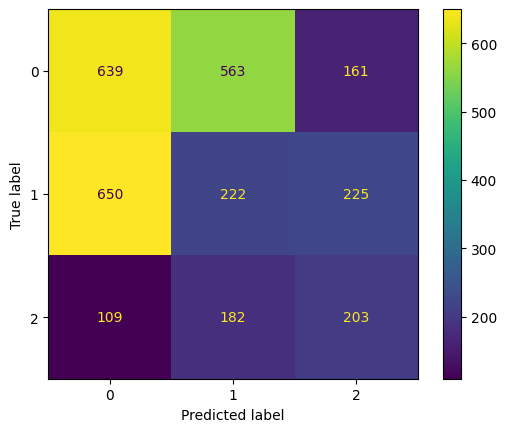



*********************************************
Train-set evaluate result:

524/524 [==============================] - 1s 1ms/step - loss: 0.2144 - accuracy: 0.9502
[0.21437272429466248, 0.9501792192459106]
524/524 [==============================] - 1s 1ms/step
Report for train set:

               precision    recall  f1-score   support

     class 0       0.98      0.96      0.97      5580
     class 1       0.98      0.90      0.94      5580
     class 2       0.90      0.99      0.94      5580

    accuracy                           0.95     16740
   macro avg       0.95      0.95      0.95     16740
weighted avg       0.95      0.95      0.95     16740



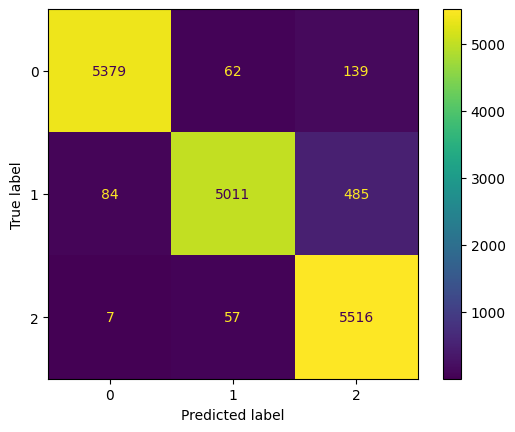

In [12]:
#***Best Model Test Only***#
#--------------------------#

model.load_weights(file_path)

############Pridecting results show######################

target_names = ['class 0', 'class 1', 'class 2']

print("Test-set evaluate result:\n")

print(model.evaluate(test_features, test_target))
test_prediction_points = model.predict(test_features)  #Probability of each class
test_prediction = numpy.argmax(test_prediction_points, axis=1)

print("Report for test set:\n\n", classification_report(test_target, test_prediction, target_names=target_names))
test_confusion_matrix = confusion_matrix(test_target, test_prediction)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_confusion_matrix)
test_disp.plot()
plt.show()

print("\n\n*********************************************\nTrain-set evaluate result:\n")

print(model.evaluate(train_features, train_target))
train_prediction_points = model.predict(train_features)  #Probability of each class
train_prediction = numpy.argmax(train_prediction_points, axis=1)

print("Report for train set:\n\n", classification_report(train_target, train_prediction, target_names=target_names))
train_confusion_matrix = confusion_matrix(train_target, train_prediction)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_confusion_matrix)
train_disp.plot()
plt.show()